# MP(McCulloch Pitts) Neuron

MP Neuron Model introduced by Warren McCulloch and Walter Pitts in 1943. MP neuron model is also known as linear threshold gate model. It is a neuron of a set of inputs and one output . The linear threshold gate simply classifies the set of inputs into two different classes. Thus the output is binary.

![](../assets/mp_neuron.png)

The MP Neuron is inspired from the biological neuron which are present in our brain.

![](../assets/human_neuron.png)

Over simplified explanation of the biological neuron:
- Dendrite: Receives signals from other neurons
- Soma: Processes the information
- Axon: Transmits the output of this neuron
- Synapse: Point of connection to other neurons

Basically, a neuron takes an input signal (dendrite), processes it like the CPU (soma), passes the output through a cable like structure to other connected neurons (axon to synapse to other neuron’s dendrite).

## Mathematical formula of MP Neuron

$\large{y = 1, \text{if } \sum_{i=0}^{n}x_i >= b}$

$\large{y = 0, \text{otherwise}}$

## Where MP Neuron Model can be used?

1. When you have Binary Input Data
2. When you have Binary Output Data
3. Where you can afford Brute-Forte search to find the vaule of threshold paramenter i.e. b

## MP Neuron - Breast Cancer Prediction - HandsOn

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0)

### Load Dataset

In [2]:
dataset = load_breast_cancer()

dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['target'] = dataset.target

In [3]:
print(dataframe.shape)

(569, 31)


## Explore Data

In [4]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


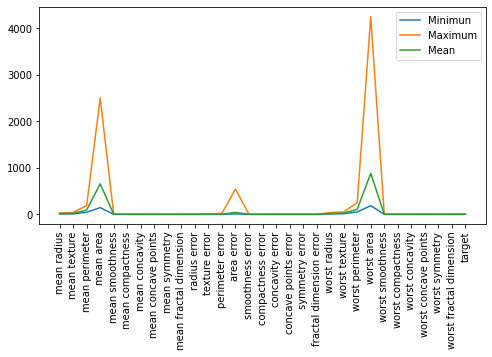

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(dataframe.describe().loc['min'].T, label='Minimun'),
plt.plot(dataframe.describe().loc['max'].T, label='Maximum'),
plt.plot(dataframe.describe().loc['mean'].T, label='Mean')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [6]:
record_counts = dataframe['target'].value_counts()

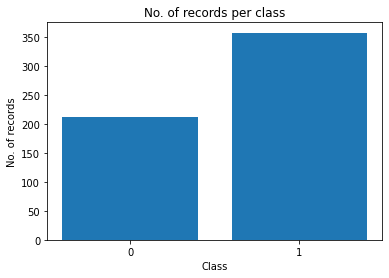

In [7]:
plt.bar(record_counts.keys(), record_counts)
plt.xticks(record_counts.keys())
plt.xlabel('Class')
plt.ylabel('No. of records')
plt.title('No. of records per class')
plt.show()

## Train-Test Split

In [8]:
# Creating separate dataframes for both X(features) and Y(target)
X = dataframe.drop(columns=['target']) # or data.drop('target', axis=1)
Y = dataframe['target']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [10]:
# Printing the train and test Y samples to ensure both the train and test contain similar no of target data
print(Y.mean(), Y_train.mean(), Y_test.mean())

# As you can see the train and test contain similar samples and this happened by providing the 'stratify' during split.

0.6274165202108963 0.6263736263736264 0.631578947368421


## Binarisation

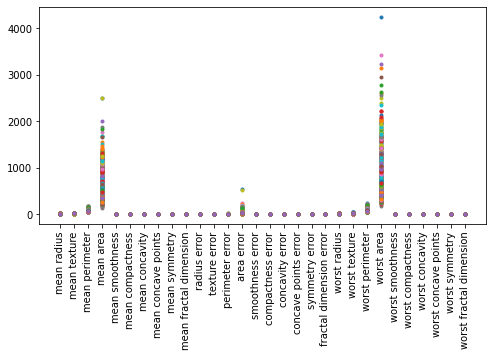

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

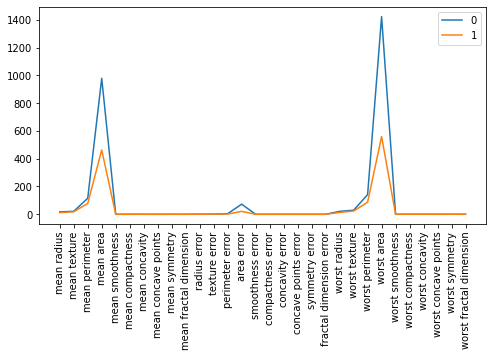

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(dataframe.groupby('target').mean().T, label=dataframe.groupby('target').groups.keys())
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [13]:
X_train = X_train.apply(pd.cut, bins=2, labels=[1, 0])

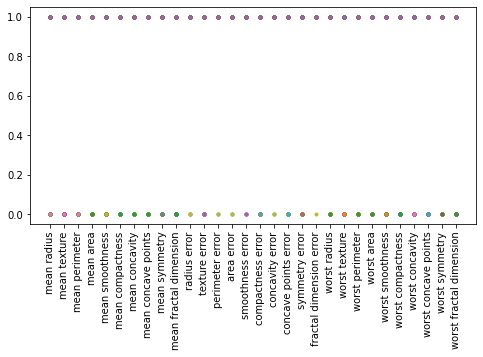

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
X_test = X_test.apply(pd.cut, bins=2, labels=[1, 0])

## Converting dataframe into numpy arrays

In [16]:
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

print(type(X_train), type(X_test), type(Y_train), type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## MP Neuron Class

In [17]:
class MPNeuron:
    def __init__(self):
        self.b = None
        self.accuracy_map = {}
        self.test_accuracy_map = {}

    def model(self, x):
        return int(np.sum(x) >= self.b)

    def predict(self, X):
        return np.asarray([self.model(x) for x in X])

    def fit(self, X, Y, test_accuracy=False, X_test=None, Y_test=None):
        for b in trange(X.shape[1], total=X.shape[1]):
            self.b = b
            Y_pred = self.predict(X)
            self.accuracy_map[self.b] = accuracy_score(Y_pred, Y)
            if test_accuracy:
                self.test_accuracy_map[self.b] = accuracy_score(self.predict(X_test), Y_test)
        self.b = max(self.accuracy_map, key=self.accuracy_map.get)
        print('Optimal value of b:', self.b)
        print('Hightest train accuracy is: ', self.accuracy_map[self.b])
        if test_accuracy:
            print('Test accuracy on best b is: ', self.test_accuracy_map[self.b])

## Train Model

100%|██████████| 30/30 [00:00<00:00, 235.70it/s]

Optimal value of b: 28
Hightest train accuracy is:  0.8703296703296703
Test accuracy on best b is:  0.7631578947368421


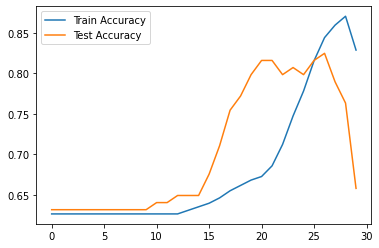

In [18]:
model = MPNeuron()
model.fit(X_train, Y_train, test_accuracy=True, X_test=X_test, Y_test=Y_test)

plt.plot(model.accuracy_map.values(), label='Train Accuracy')
plt.plot(model.test_accuracy_map.values(), label='Test Accuracy')
plt.legend()
plt.show()